# Project on Student Academic's Performance

## Load dataset and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import smtplib
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
sp = pd.read_csv('xAPI-Edu-Data.csv')
sp.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


## Pairplot (Histogram, Scatter Plot, Kernel Density Estimation Plot )

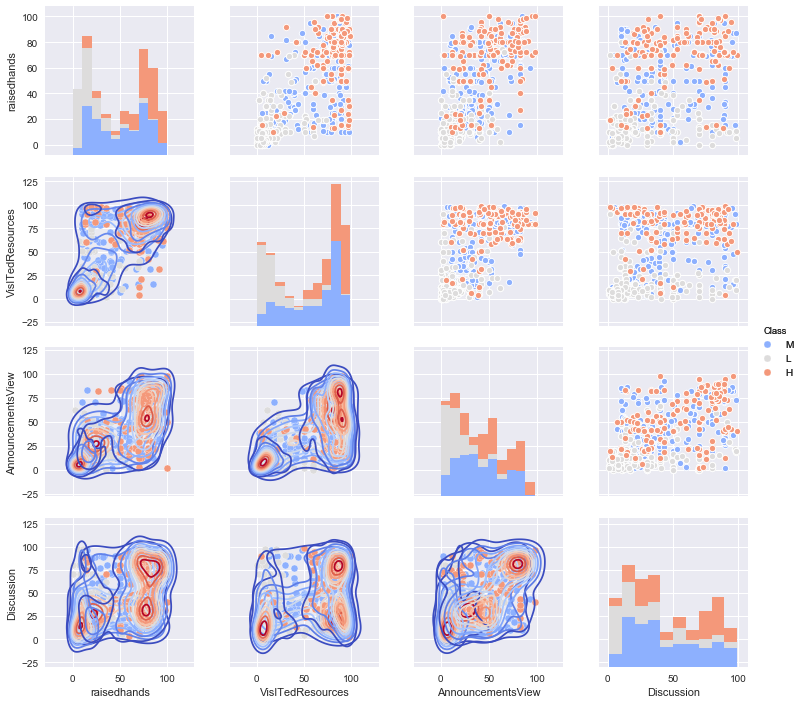

In [3]:
g = sns.pairplot(sp,hue='Class',palette='coolwarm')
g = g.map_diag(plt.hist)
g = g.map_upper(plt.scatter, linewidths=1, edgecolor='w', s=40)
g = g.map_lower(sns.kdeplot, lw=3, legend=False, cmap='coolwarm')
g = g.add_legend()

### Raised Hands
* High raised hands frequency for high academic performed student; low performers tend to inactive

### Visited Resources
* Low performers rarely visited the course resources. The graph indicates that the highest and lowest performers had the most consistent habits with respect to viewing the course resources

### Announcements View
* Less students from all groups viewed course announcements, but there is still a clear pattern with viewing course announcements and how well the student performed

### Discussion
* Those who did well were more active in class, and the low performers were the least active

## Correlation and Heatmap
* Convert categorical data to numerical data in order to see the correlation of the attributes 

In [4]:
cvtnum_sp = sp

gender_map = {'M':1, 
              'F':2}

NationalITy_map = {  'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}
PlaceofBirth_map =  {'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}

StageID_map = {'HighSchool':1, 
               'MiddleSchool':2,
               'lowerlevel':3}

GradeID_map =   {'G-02':2,
                 'G-08':8,
                 'G-09':9,
                 'G-04':4,
                 'G-05':5,
                 'G-06':6,
                 'G-07':7,
                 'G-12':12,
                 'G-11':11,
                 'G-10':10}

SectionID_map = {'A':1,  
                 'B':2,
                 'C':3}

Topic_map  =    {'Biology' : 1,
                 'Geology' : 2,
                 'Quran' : 3,
                 'Science' : 4,
                 'Spanish' : 5,
                 'IT' : 6,
                 'French' : 7,
                 'English' :8,
                 'Arabic' :9,
                 'Chemistry' :10,
                 'Math' :11,
                 'History' : 12}
Semester_map = {'S':1, 
                'F':2}

Relation_map = {'Mum':1, 
                'Father':2} 

ParentAnsweringSurvey_map = {'Yes':1,
                             'No':0}

ParentschoolSatisfaction_map = {'Bad':0,
                                'Good':1}

StudentAbsenceDays_map = {'Under-7':0,
                          'Above-7':1}

Class_map = {'H':10,
             'M':5,
             'L':2}

cvtnum_sp.gender  = cvtnum_sp.gender.map(gender_map)
cvtnum_sp.NationalITy     = cvtnum_sp.NationalITy.map(NationalITy_map)
cvtnum_sp.PlaceofBirth     = cvtnum_sp.PlaceofBirth.map(PlaceofBirth_map)
cvtnum_sp.StageID       = cvtnum_sp.StageID.map(StageID_map)
cvtnum_sp.GradeID = cvtnum_sp.GradeID.map(GradeID_map)
cvtnum_sp.SectionID    = cvtnum_sp.SectionID.map(SectionID_map)
cvtnum_sp.Topic     = cvtnum_sp.Topic.map(Topic_map)
cvtnum_sp.Semester   = cvtnum_sp.Semester.map(Semester_map)
cvtnum_sp.Relation   = cvtnum_sp.Relation.map(Relation_map)
cvtnum_sp.ParentAnsweringSurvey   = cvtnum_sp.ParentAnsweringSurvey.map(ParentAnsweringSurvey_map)
cvtnum_sp.ParentschoolSatisfaction   = cvtnum_sp.ParentschoolSatisfaction.map(ParentschoolSatisfaction_map)
cvtnum_sp.StudentAbsenceDays   = cvtnum_sp.StudentAbsenceDays.map(StudentAbsenceDays_map)
cvtnum_sp.Class  = cvtnum_sp.Class.map(Class_map)

In [5]:
cvtnum_sp.corr()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.115850,-0.106873,0.017793,-0.018304,-0.054907,-0.004336,0.049156,-0.195142,0.149978,0.210932,0.052139,0.124703,0.022359,0.093478,-0.209011,0.259713
NationalITy,-0.115850,1.000000,0.905239,0.004731,0.007082,0.010240,0.045876,0.150257,0.237680,-0.061462,-0.100490,-0.143961,0.042010,0.017254,-0.039137,-0.000887,-0.076871
PlaceofBirth,-0.106873,0.905239,1.000000,0.038040,-0.026669,0.035751,0.075617,0.141741,0.242518,-0.100488,-0.116153,-0.166138,0.020353,0.043879,-0.015922,0.029063,-0.081499
StageID,0.017793,0.004731,0.038040,1.000000,-0.951452,0.296416,0.101451,0.029512,-0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,0.112536,-0.073349
GradeID,-0.018304,0.007082,-0.026669,-0.951452,1.000000,-0.329056,-0.091057,-0.076370,0.034626,0.194382,0.078741,0.198552,0.180966,0.116915,-0.018349,-0.084896,0.061269
SectionID,-0.054907,0.010240,0.035751,0.296416,-0.329056,1.000000,-0.142515,-0.046763,-0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,-0.037062,-0.036378
Topic,-0.004336,0.045876,0.075617,0.101451,-0.091057,-0.142515,1.000000,0.010069,0.014026,-0.146281,-0.142789,-0.104989,-0.038416,0.001485,-0.032494,0.087633,-0.062911
Semester,0.049156,0.150257,0.141741,0.029512,-0.076370,-0.046763,0.010069,1.000000,0.148705,-0.178358,-0.173219,-0.287066,-0.019083,-0.023628,0.025258,0.072462,-0.121480
Relation,-0.195142,0.237680,0.242518,-0.034205,0.034626,-0.005783,0.014026,0.148705,1.000000,-0.364237,-0.360240,-0.339505,-0.026720,-0.163811,-0.287698,0.219687,-0.410879
raisedhands,0.149978,-0.061462,-0.100488,-0.172751,0.194382,-0.143862,-0.146281,-0.178358,-0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882,0.623671


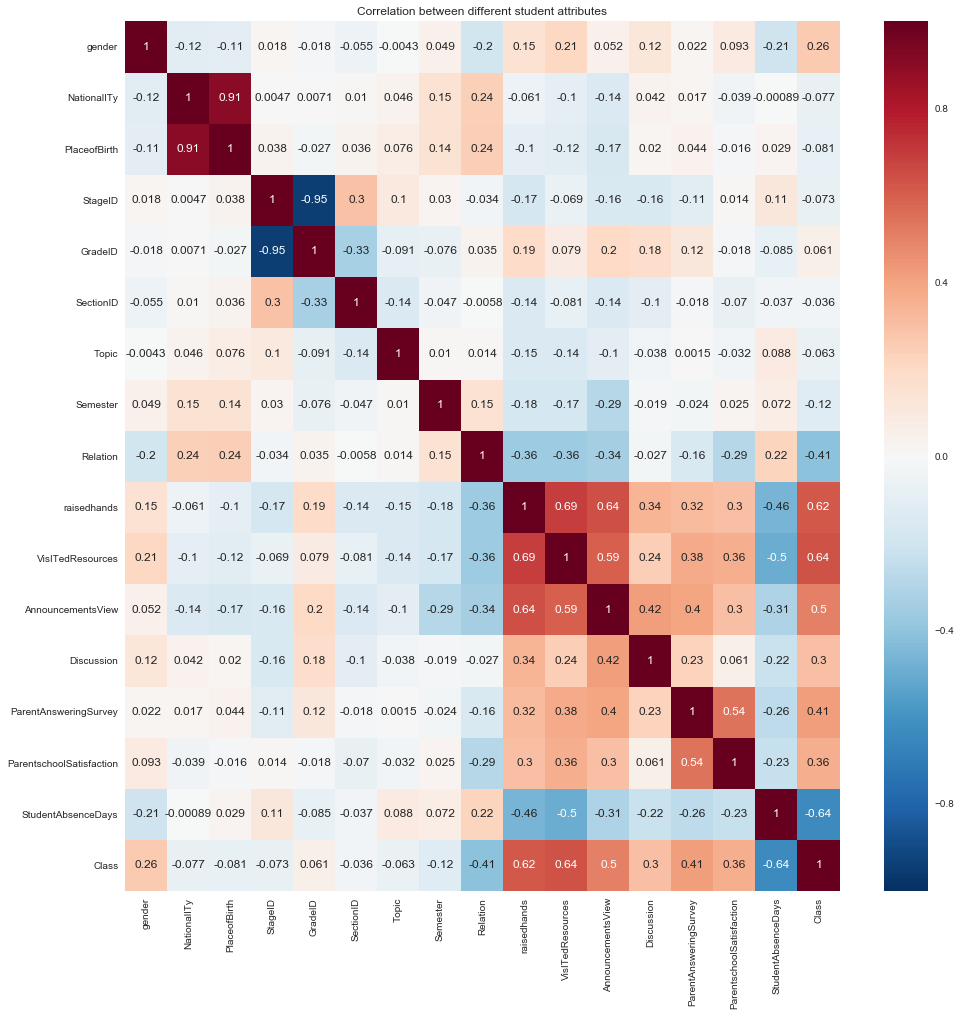

In [6]:
variable_correlations = sp.corr()
#variable correlations heatmap
plt.figure(figsize=(16,16))
sns.heatmap(variable_correlations,annot=True)
plt.title('Correlation between different student attributes')

### Interpretation
***Highly related variables***
* Nationality and Place of Birth (Positively correlated)
* StageID and GradeID (Negatively correlated)

    * However, these variables are not relevant for academic performance evaluation

* Raised Hands, Visited Resources and Announcement Views (highly correlated > 0.5)

    * The relationship between the variables are evaluate

***Variables highly correlated with Class***
* Raised Hands
* Visited Resources
* Anouncement View
* Student Absence Days

### Behavioural/Compulsory
* Raised hands, visited resources, announcement view, and student absence days show student attempts to achieve better grades
* Discussion in class is compulsory for students to be part of it

## Distplot
* Plots of Discrete and Continuous Distributions

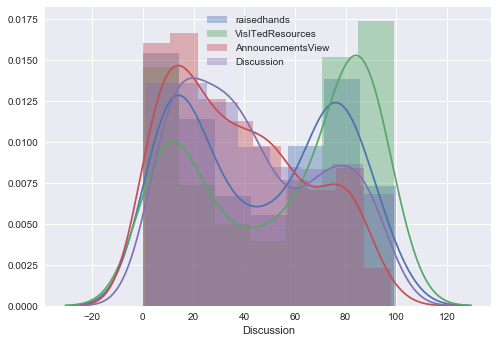

In [9]:
sns.distplot(sp["raisedhands"],label="raisedhands") 
sns.distplot(sp["VisITedResources"],label="VisITedResources")
sns.distplot(sp["AnnouncementsView"],label="AnnouncementsView")
sns.distplot(sp["Discussion"],label="Discussion")
plt.legend()

### Interpretation:
The multivariate density of four variables namely raisedhands, VisITedResources, AnnouncementsView, and Discussion are showed. The overlay histogram is used to understand the relationship better, whereas the density curves are used to see the distribution better. From the distribution, it shows there are two distinct groups of student.

* The Kernel Density Estimation (KDE) shows a probability density which is sort of a meaningless value in isolation, but it becomes meaningful when you integrate it across some range of x. Used to visualize estimated underlying distribution.

## Scatter Plot with Regression Line

In [22]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

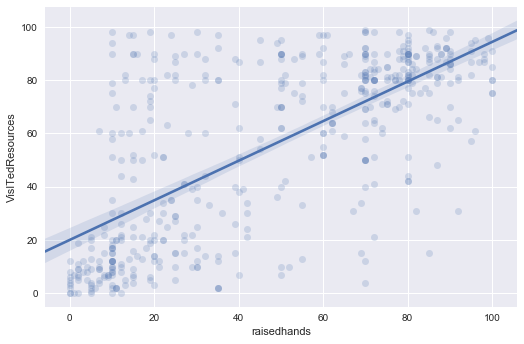

In [28]:
# Seaborn scatter plot with regression line
sns.lmplot(x='raisedhands', y='VisITedResources', data=cvtnum_sp, aspect=1.5, scatter_kws={'alpha':0.2})

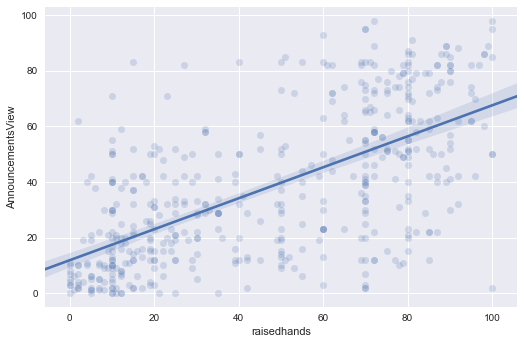

In [31]:
# Seaborn scatter plot with regression line
sns.lmplot(x='raisedhands', y='AnnouncementsView', data=cvtnum_sp, aspect=1.5, scatter_kws={'alpha':0.2})

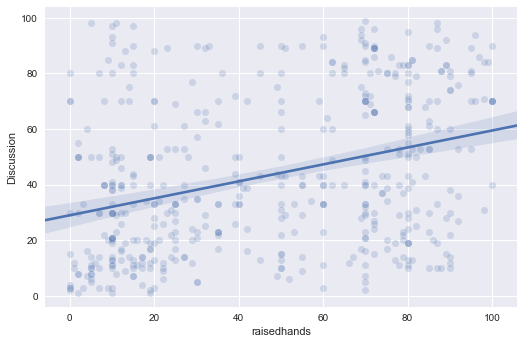

In [32]:
# Seaborn scatter plot with regression line
sns.lmplot(x='raisedhands', y='Discussion', data=cvtnum_sp, aspect=1.5, scatter_kws={'alpha':0.2})

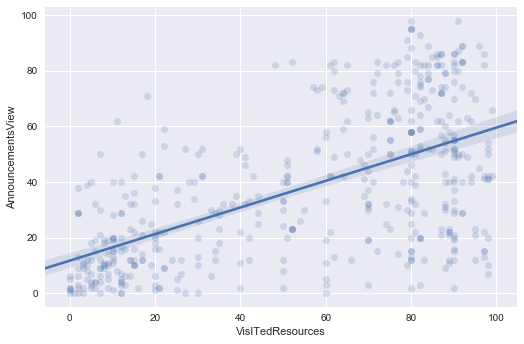

In [33]:
# Seaborn scatter plot with regression line
sns.lmplot(x='VisITedResources', y='AnnouncementsView', data=cvtnum_sp, aspect=1.5, scatter_kws={'alpha':0.2})

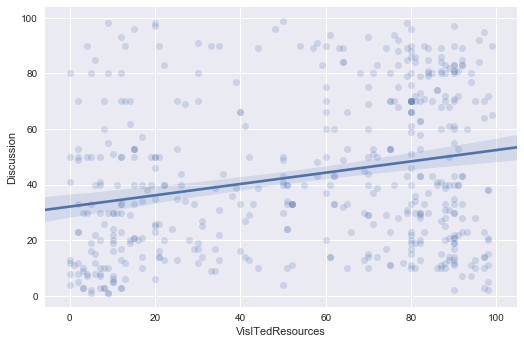

In [34]:
# Seaborn scatter plot with regression line
sns.lmplot(x='VisITedResources', y='Discussion', data=cvtnum_sp, aspect=1.5, scatter_kws={'alpha':0.2})

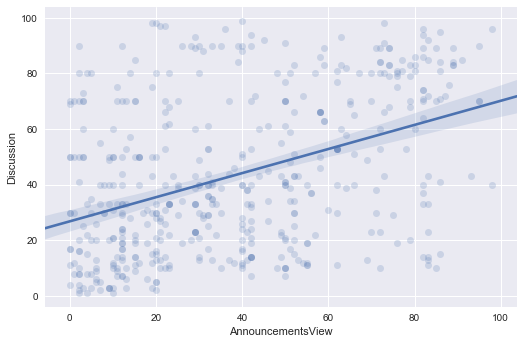

In [35]:
# Seaborn scatter plot with regression line
sns.lmplot(x='AnnouncementsView', y='Discussion', data=cvtnum_sp, aspect=1.5, scatter_kws={'alpha':0.2})

## From above, we can see relationship of variables are positive linear relationships.